# Model Training and Result Analysis

## Imports and Data Loading

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

# Model Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Defining useful functions

In [3]:
def evaluate(y_test, y_pred):
    # confusion matrix
    print(confusion_matrix(y_test, y_pred))

    # accuracy, precision, recall, f1
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1:", f1_score(y_test, y_pred, average='weighted'))

In [5]:
def show_cm(cm, classes, figsize=(10, 10)):
    # cm = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=figsize)
    plt.imshow(cm)
    plt.suptitle('Confusion matrix')
    total = sum(sum(cm))
    plt.title('Total cases: {}'.format(total))
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            perc = round(cm[i, j] / total * 100, 1)
            plt.text(j, i, f"{format(cm[i, j], '.0f')} : {perc}%", horizontalalignment="center",
                     color="black" if cm[i, j] > cm.max() / 2 else "white")

    plt.show()

## Defining the models to be trained

In [27]:
models = [
    lambda: MultinomialNB(), # Naive Bayes
    lambda: DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42),
    lambda: GaussianNB(),
    lambda: KNeighborsClassifier(n_neighbors=15, weights='uniform'),
    # lambda: GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42),
    lambda: RandomForestClassifier(n_estimators=100, random_state=42),
    lambda: MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42), # Neural Network
    # lambda: SVC(C=0.1, kernel='linear', probability=True), # Support Vector Machine
    lambda: LogisticRegression(penalty='l2'), # Linear Model with overfitting avoidance
    lambda: LinearSVC(penalty='l2'), # Linear Model with overfitting avoidance

    # Linear Model with stochastic gradient descent learning (loss function)
    lambda: SGDClassifier(loss='log', penalty='l2', alpha=0.001, max_iter=100, random_state=42)
]

# Model Training

In [28]:
# Choose one of the following representations
# df = pd.read_pickle('data/reps/1_bow.pkl')
# df = pd.read_pickle('data/reps/2_one_hot.pkl')
# df = pd.read_pickle('data/reps/3_tf_idf.pkl')
df = pd.read_pickle('data/reps/4_embeddings_original.pkl')
# df = pd.read_pickle('data/reps/5_embeddings_twitter.pkl')
# df = pd.read_pickle('data/reps/6_embeddings_fasttext.pkl')
df = df.reset_index(drop=True)

df.head()

,text,emotions
0,"[0.15587032, -0.04093878, 0.11870636, 0.045677...",anger
1,"[0.033757817, 0.011225144, 0.12463021, 0.03906...",anger
2,"[0.06391803, 0.055304002, 0.101929195, 0.00956...",anger
3,"[0.025558282, 0.020697827, 0.18692164, 0.14508...",anger
4,"[0.013918345, 0.038560368, 0.01505286, 0.10968...",anger


In [29]:
df_features = pd.DataFrame(df['text'].values.tolist())
df = pd.concat([df_features, df['emotions']], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,emotions
0,0.155870,-0.040939,0.118706,0.045677,-0.104883,-0.047179,-0.009185,0.316924,0.036000,-0.114826,...,0.158344,0.119604,-0.114890,0.304836,-0.067591,0.132713,-0.176872,0.209954,-0.040415,anger
1,0.033758,0.011225,0.124630,0.039060,0.051405,-0.012843,0.047273,0.309644,0.036521,-0.031892,...,0.254953,0.064719,-0.064913,0.216322,0.077409,0.132380,-0.112591,0.233211,-0.123260,anger
2,0.063918,0.055304,0.101929,0.009568,0.021917,-0.055865,-0.018118,0.360975,-0.024572,-0.242145,...,0.152445,0.147325,0.018027,0.292292,0.154910,0.065899,-0.018073,0.107516,0.004439,anger
3,0.025558,0.020698,0.186922,0.145086,-0.026136,-0.058595,-0.062111,0.415689,0.014830,-0.105275,...,0.128759,-0.045817,-0.027855,0.275884,0.068262,0.055834,-0.078326,0.128050,-0.140922,anger
4,0.013918,0.038560,0.015053,0.109682,-0.041429,-0.003190,-0.027949,0.356276,0.059882,-0.148994,...,0.230532,0.059447,-0.023003,0.272751,0.099168,0.161569,-0.105375,0.119162,-0.095682,anger


In [30]:
# Print the balance of the dataset
print(df['emotions'].value_counts())

emotions
joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: count, dtype: int64


In [ ]:
# Sample data to only 10000 rows for the grid search
# df = df.sample(n=10000, random_state=42)

In [ ]:
# Use grid search to find the best hyperparameters for neural network
model = MLPClassifier()
param_grid = { # 188min
    'hidden_layer_sizes': [(100, 50), (100, 100), (50, 50), (150, 100), (200, 100)],
    'max_iter': [1000, 2000],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'random_state': [42]
}

df_features = df.drop('emotions', axis=1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(df_features, df['emotions'])

print(grid_search.best_params_)
# result example: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[[ 9335   718   401    91   877    41]
 [  440  7774   342    37   526   423]
 [  275   365 25318  1200   778   278]
 [   82    77  2025  4411   279    37]
 [  611   550   866   158 21953   100]
 [   53   464   261     8   195  2013]]
Accuracy: 0.8493558215973706
Precision: 0.8479889361188329
Recall: 0.8493558215973706
F1: 0.8480625622738612


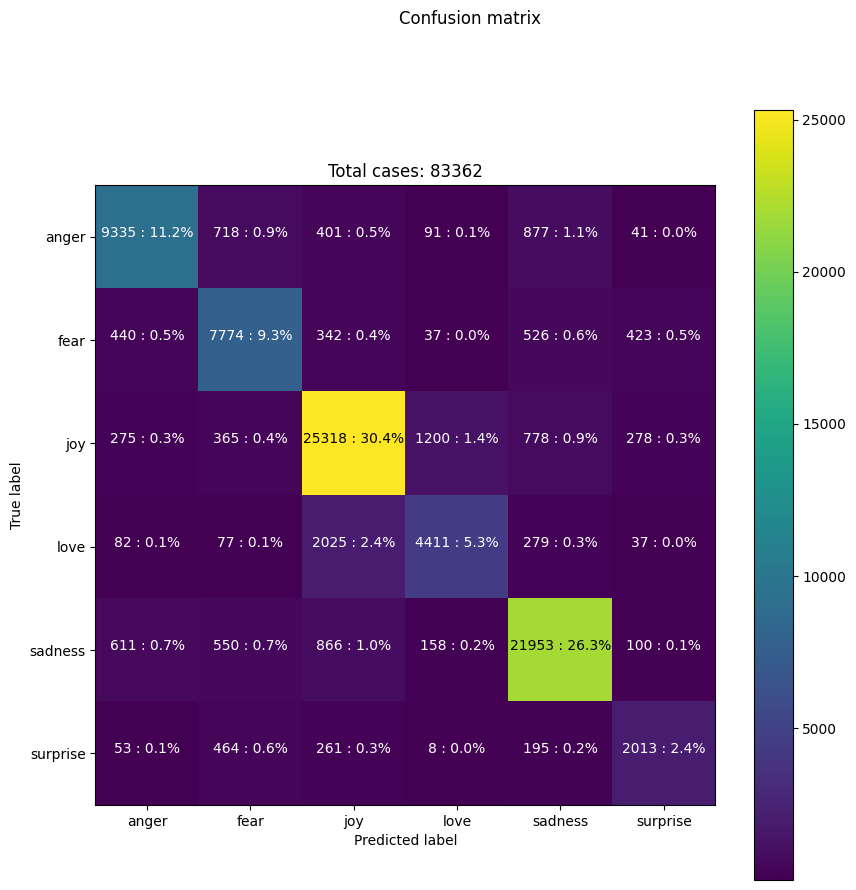

In [31]:
x = df.drop('emotions', axis=1).values
y = df['emotions']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

# Initialize model
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, activation='relu', solver='sgd', alpha=0.0001, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
evaluate(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show confusion matrix
show_cm(cm, y.unique())

Model 1 - DecisionTreeClassifier(max_depth=5, random_state=42)
[[ 2289     0  5111     5  4058     0]
 [  756     0  5155     5  3626     0]
 [ 1238     0 21141     5  5830     0]
 [  436     0  4272    62  2141     0]
 [  940     0  7430    18 15850     0]
 [   80     0  1721     0  1193     0]]
Accuracy: 0.4719416520716873


/home/sparks/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.4094990806997664
Recall: 0.4719416520716873
F1: 0.39586057717310097


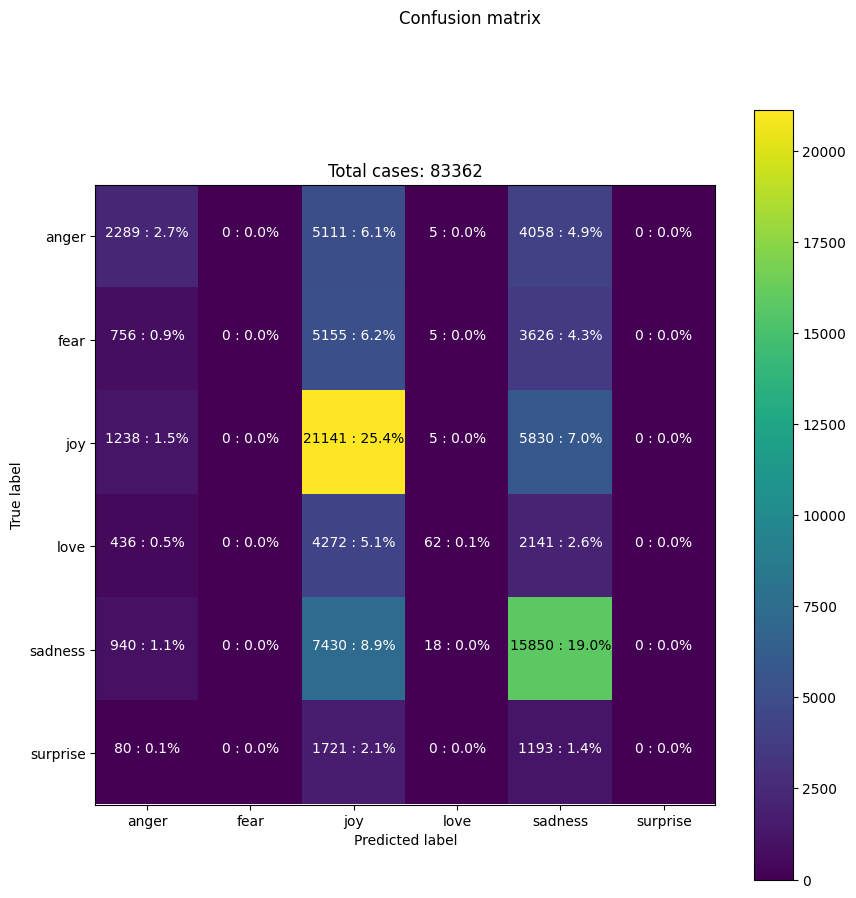

Model 2 - GaussianNB()
[[ 7250   905   946   635   759   968]
 [ 1243  5266   843   347   544  1299]
 [ 1957  1281 17090  4073  1159  2654]
 [  617   184  1394  3866   325   525]
 [ 2451   945  1807  1346 14459  3230]
 [   92   232   195    93   219  2163]]
Accuracy: 0.6009212830786209
Precision: 0.6801318165928546
Recall: 0.6009212830786209
F1: 0.6242915360837459


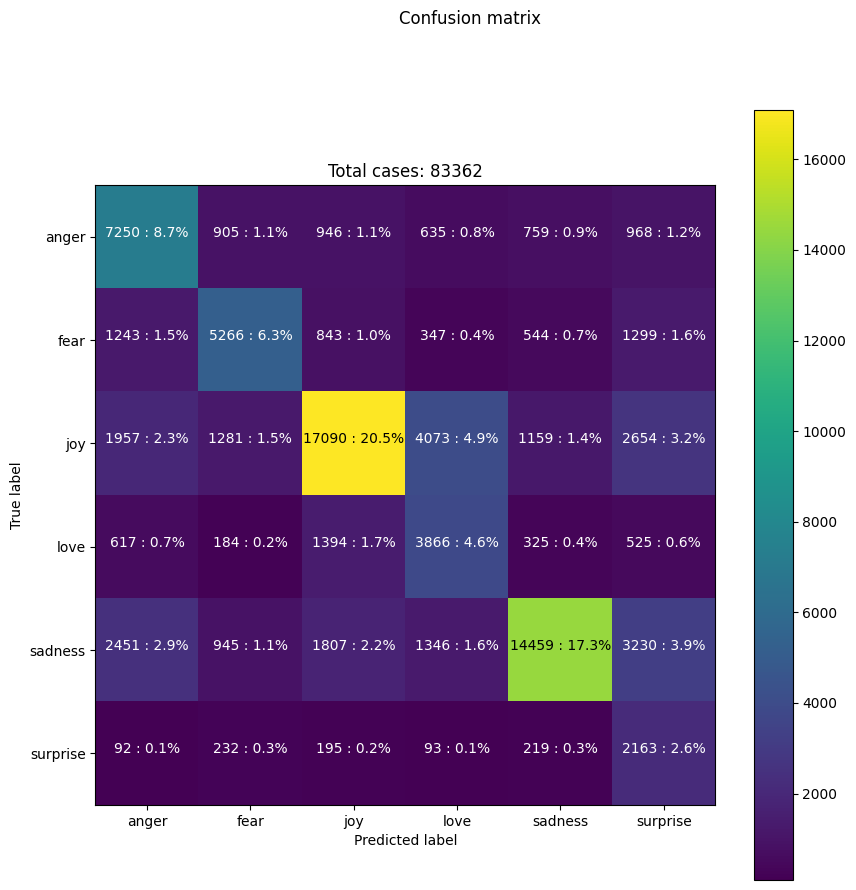

Model 3 - KNeighborsClassifier(n_neighbors=15)
[[ 7181   513  1686   105  1964    14]
 [  977  4930  1773    75  1566   221]
 [  729   482 23969   906  2024   104]
 [  259   103  3088  2795   657     9]
 [ 1164   598  3096   205 19144    31]
 [  112   529   945    43   574   791]]
Accuracy: 0.7054773158033636
Precision: 0.703441182095958
Recall: 0.7054773158033636
F1: 0.693839163188723


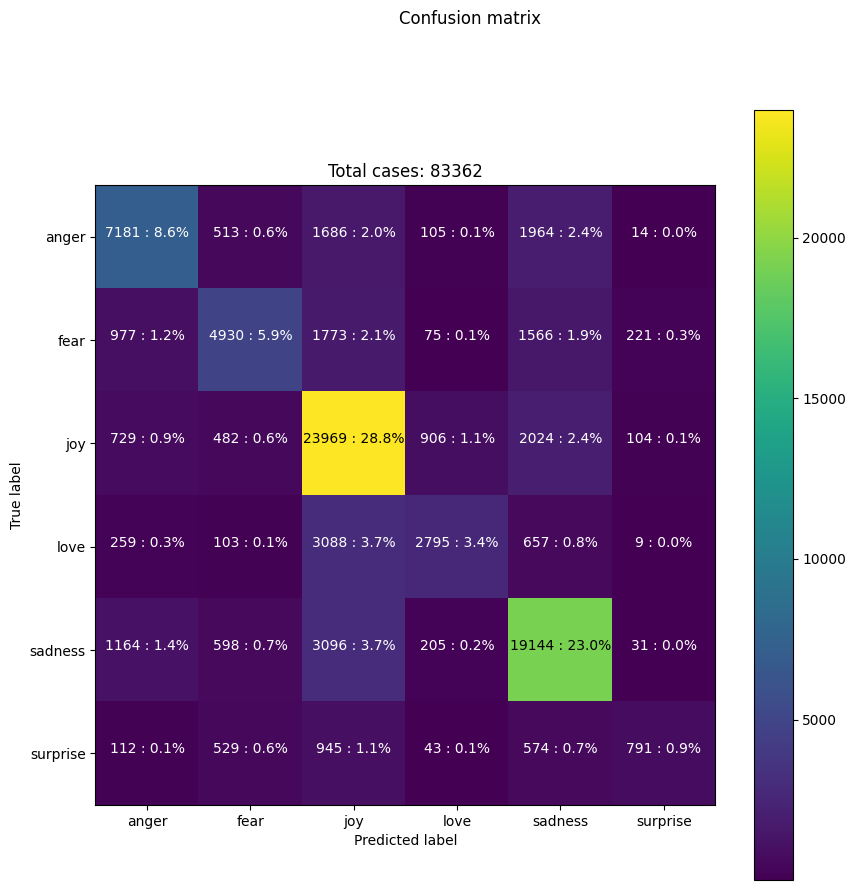

Model 4 - RandomForestClassifier(random_state=42)
[[ 4942   462  2824    15  3220     0]
 [  722  2767  3167    13  2281   592]
 [  116    68 24343  1647  1847   193]
 [   60    15  4829  1108   897     2]
 [  610   381  3372    12 19849    14]
 [   13   676  1296     4   803   202]]
Accuracy: 0.6383124205273386
Precision: 0.6242557762552213
Recall: 0.6383124205273386
F1: 0.6032947746790653


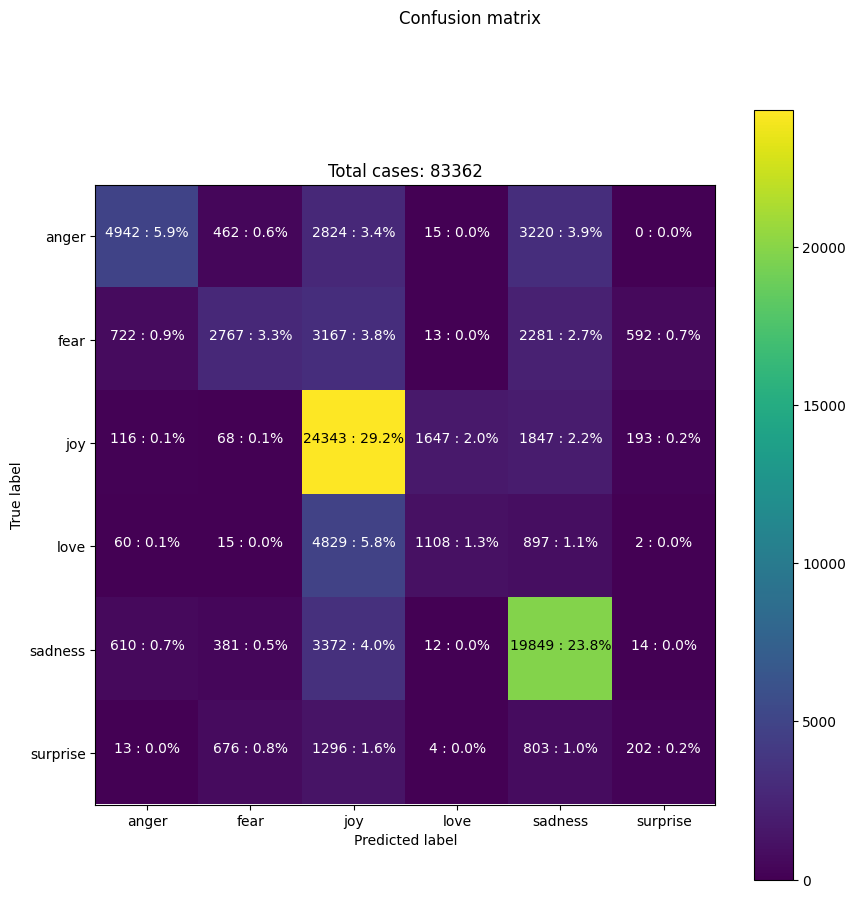

Model 5 - MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
[[ 9491   663   347    96   827    39]
 [  593  7365   331    47   646   560]
 [  337   381 24612  1620   937   327]
 [   93    75  1701  4710   310    22]
 [  761   494   711   229 21889   154]
 [   41   401   189    20   229  2114]]
Accuracy: 0.8418823924569948
Precision: 0.8418110772866658
Recall: 0.8418823924569948
F1: 0.8417444306915961


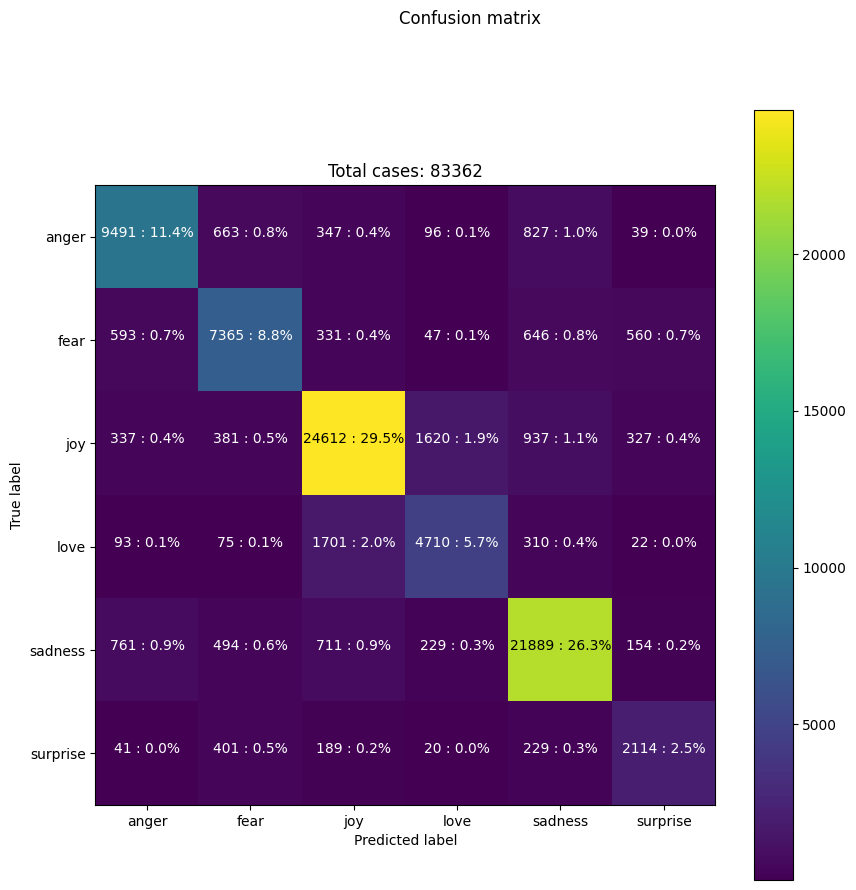

Model 6 - LogisticRegression()


/home/sparks/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 9219   639   583   108   880    34]
 [  772  7227   570    42   617   314]
 [  365   328 25257  1088   940   236]
 [  108    81  2499  3765   442    16]
 [  658   473  1227   187 21558   135]
 [   56   439   332    16   443  1708]]
Accuracy: 0.8245243636189151
Precision: 0.8210195338266784
Recall: 0.8245243636189151
F1: 0.8209735366038551


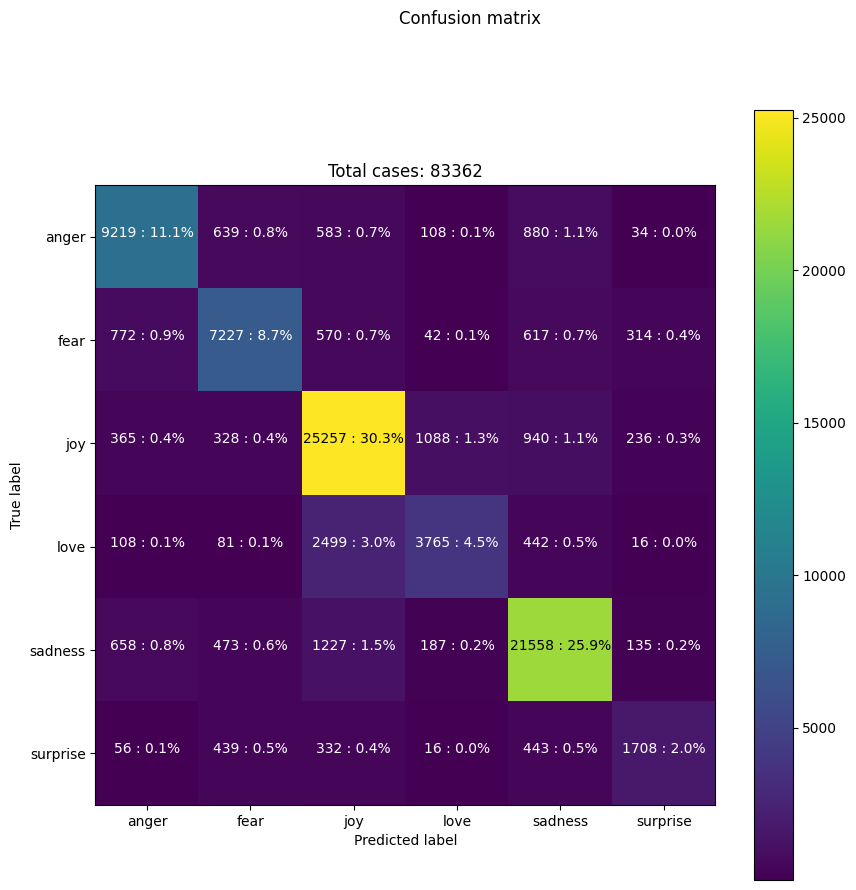

Model 7 - LinearSVC()
[[ 9196   501   731   102   908    25]
 [  755  7073   745    47   682   240]
 [  377   301 25419   872  1035   210]
 [  144    94  2622  3448   585    18]
 [  626   444  1310   130 21667    61]
 [   75   448   393    22   479  1577]]
Accuracy: 0.8202778244283966
Precision: 0.8170008124796242
Recall: 0.8202778244283966
F1: 0.8149485063469907


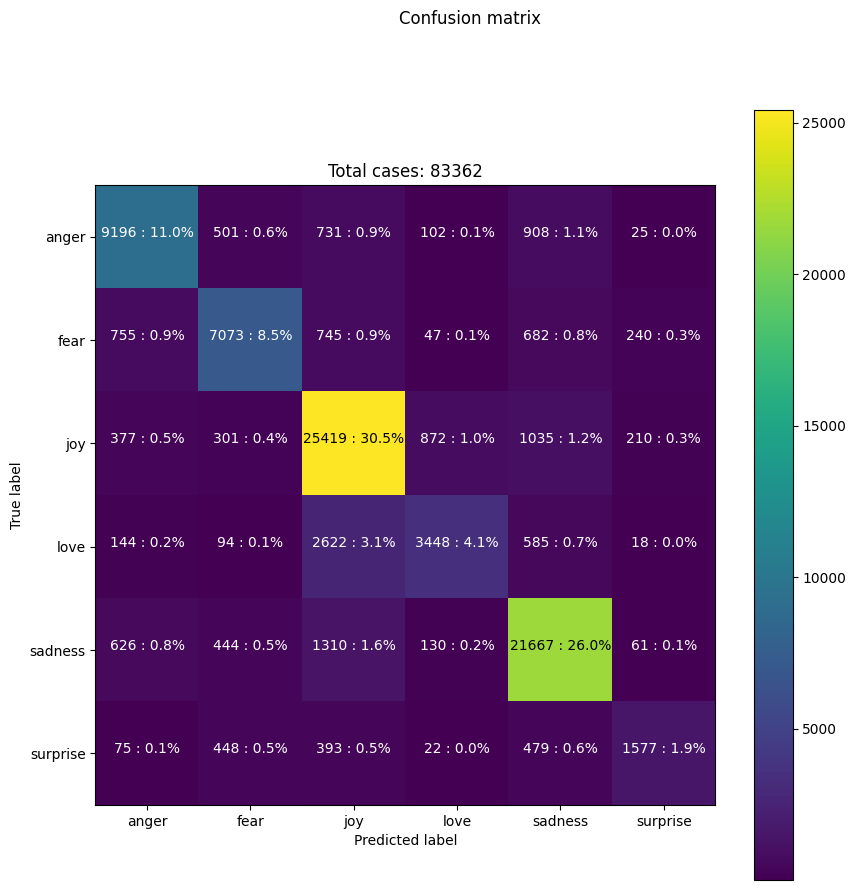

Model 8 - SGDClassifier(alpha=0.001, loss='log', max_iter=100, random_state=42)


/home/sparks/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[[ 6387   218  2348    30  2478     2]
 [  786  4166  2743    17  1821     9]
 [  113    79 26353    95  1569     5]
 [   82    26  5149   645  1009     0]
 [  159   138  2387    29 21524     1]
 [   20   316  1156     7  1457    38]]
Accuracy: 0.7091120654494854
Precision: 0.7344568644483589
Recall: 0.7091120654494854
F1: 0.6653272423332868


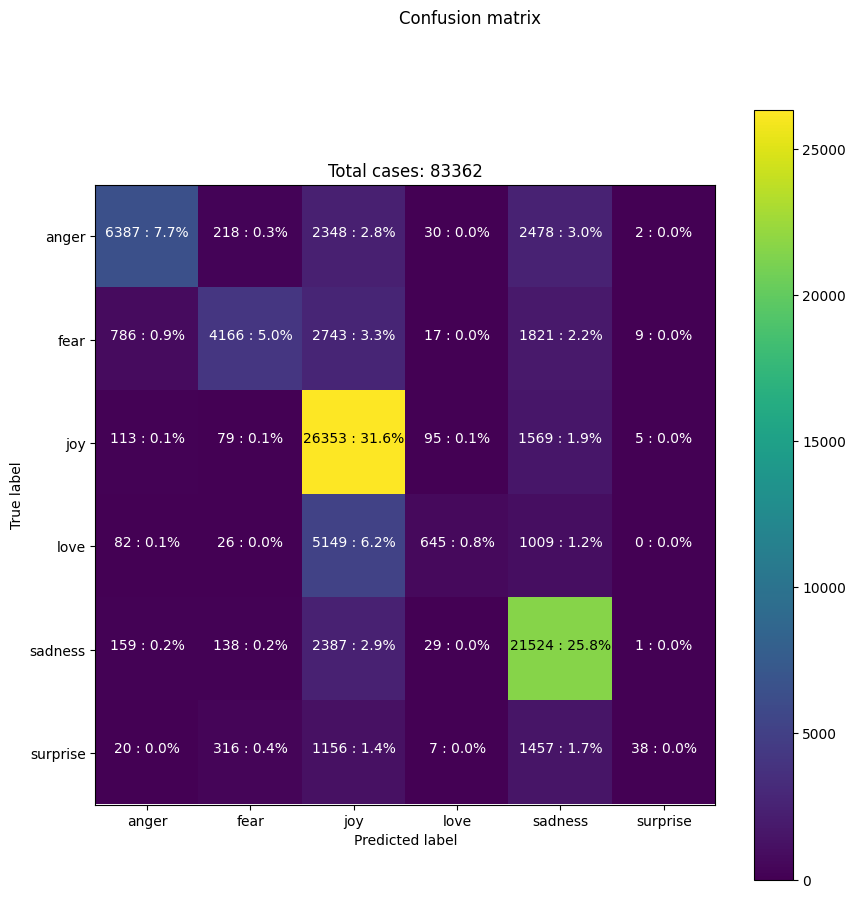

In [10]:
# Running all models
x = df.drop('emotions', axis=1).values
y = df['emotions']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

for i in range(1, len(models)):
    print(f"Model {i} - {models[i]()}")
    model = models[i]()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    evaluate(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Show confusion matrix
    show_cm(cm, y.unique())